In [134]:
from email.mime import image

import numpy as np
import math
from PIL import Image, ImageOps

In [135]:
img_mat = np.zeros((4000,4000,3),dtype = np.uint8)

f = open("../model.obj","r")
lines = f.readlines()
k = 0
xst =0
yst = 0
vs = []
polygons = []
for i in lines:
    s = i.split()
    if s[0] == 'v':
        vs.append((20000*float(s[1])+1000,20000*float(s[2])+300, 20000*float(s[3])+300))
    if s[0] == 'f':
        arr = []
        for j in s[1:]:
            arr.append(int(j[:j.find('/')]))
        polygons.append(arr)



# 2 лаба

In [136]:
def bary(x0, y0, x1, y1, x2, y2, x, y):
    l0 = ((x-x2)*(y1-y2) - (x1-x2)*(y-y2)) / ((x0-x2) * (y1-y2) - (x1-x2) * (y0-y2))

    l1 = ((x0-x2)*(y-y2) - (x-x2)*(y0-y2)) / ( (x0-x2) * (y1-y2) -  (x1-x2) * (y0-y2))

    l2 = 1.0 - l0 - l1

    return l0, l1, l2

In [137]:
def draw(x0, y0, z0, x1, y1, z1, x2, y2, z2,color):
    xmin = int(max(min(x0, x1, x2),0))
    xmax = min(int(max(x0, x1, x2))+1,2500)
    ymin = int(max(min(y0, y2,y1),0))
    ymax = min(int(max(y0, y1, y2))+1,2500)

    for x in range(xmin, xmax):
        for y in range(ymin, ymax):
            l1, l2, l3 = bary(x0, y0, x1, y1, x2, y2, x, y)
            z = l1 * z0 + l2 * z1 + l3 * z2
            if 0<=l1<=1 and 0<=l2<=1 and 0<=l3<=1 and z <  z_b[y,x]:
                img_mat[y, x] = color
                z_b[y,x] = z

In [138]:
def normal(x0, y0, z0, x1, y1, z1, x2, y2, z2):
    f = [x1-x2, y1-y2, z1-z2]
    s = [x1-x0, y1-y0, z1-z0]

    return np.cross(f,s)

In [139]:
def cos_alpha(n, l = (0,0,1)):
    return np.dot(n,l) / (np.linalg.norm(n) * np.linalg.norm(l))


In [140]:
img_mat = np.zeros((2500,2500,3),dtype = np.uint8)

In [141]:
#draw(-100,2000, 2000, 1000, 3000, 5000, np.random.randint(0,255,(3,)) )

In [142]:

img = Image.fromarray(img_mat,mode='RGB')
img = ImageOps.flip(img)
img.save('img.png')

In [143]:
z_b = np.full((2500, 2500,1), 10000)

In [144]:
for polygon in polygons:
    num1 = polygon[0]-1
    num2 = polygon[1]-1
    num3 = polygon[2]-1
    try:
        cos_a = cos_alpha(normal(vs[num1][0],vs[num1][1], vs[num1][2],vs[num2][0], vs[num2][1], vs[num2][2], vs[num3][0], vs[num3][1], vs[num3][2]))
        if cos_a < 0:
            draw(vs[num1][0],vs[num1][1], vs[num1][2],vs[num2][0], vs[num2][1], vs[num2][2], vs[num3][0], vs[num3][1], vs[num3][2], (-255*cos_a, 0, 0))

    except ZeroDivisionError:
        continue

img = Image.fromarray(img_mat,mode='RGB')
img = ImageOps.flip(img)
img.save('img.png')

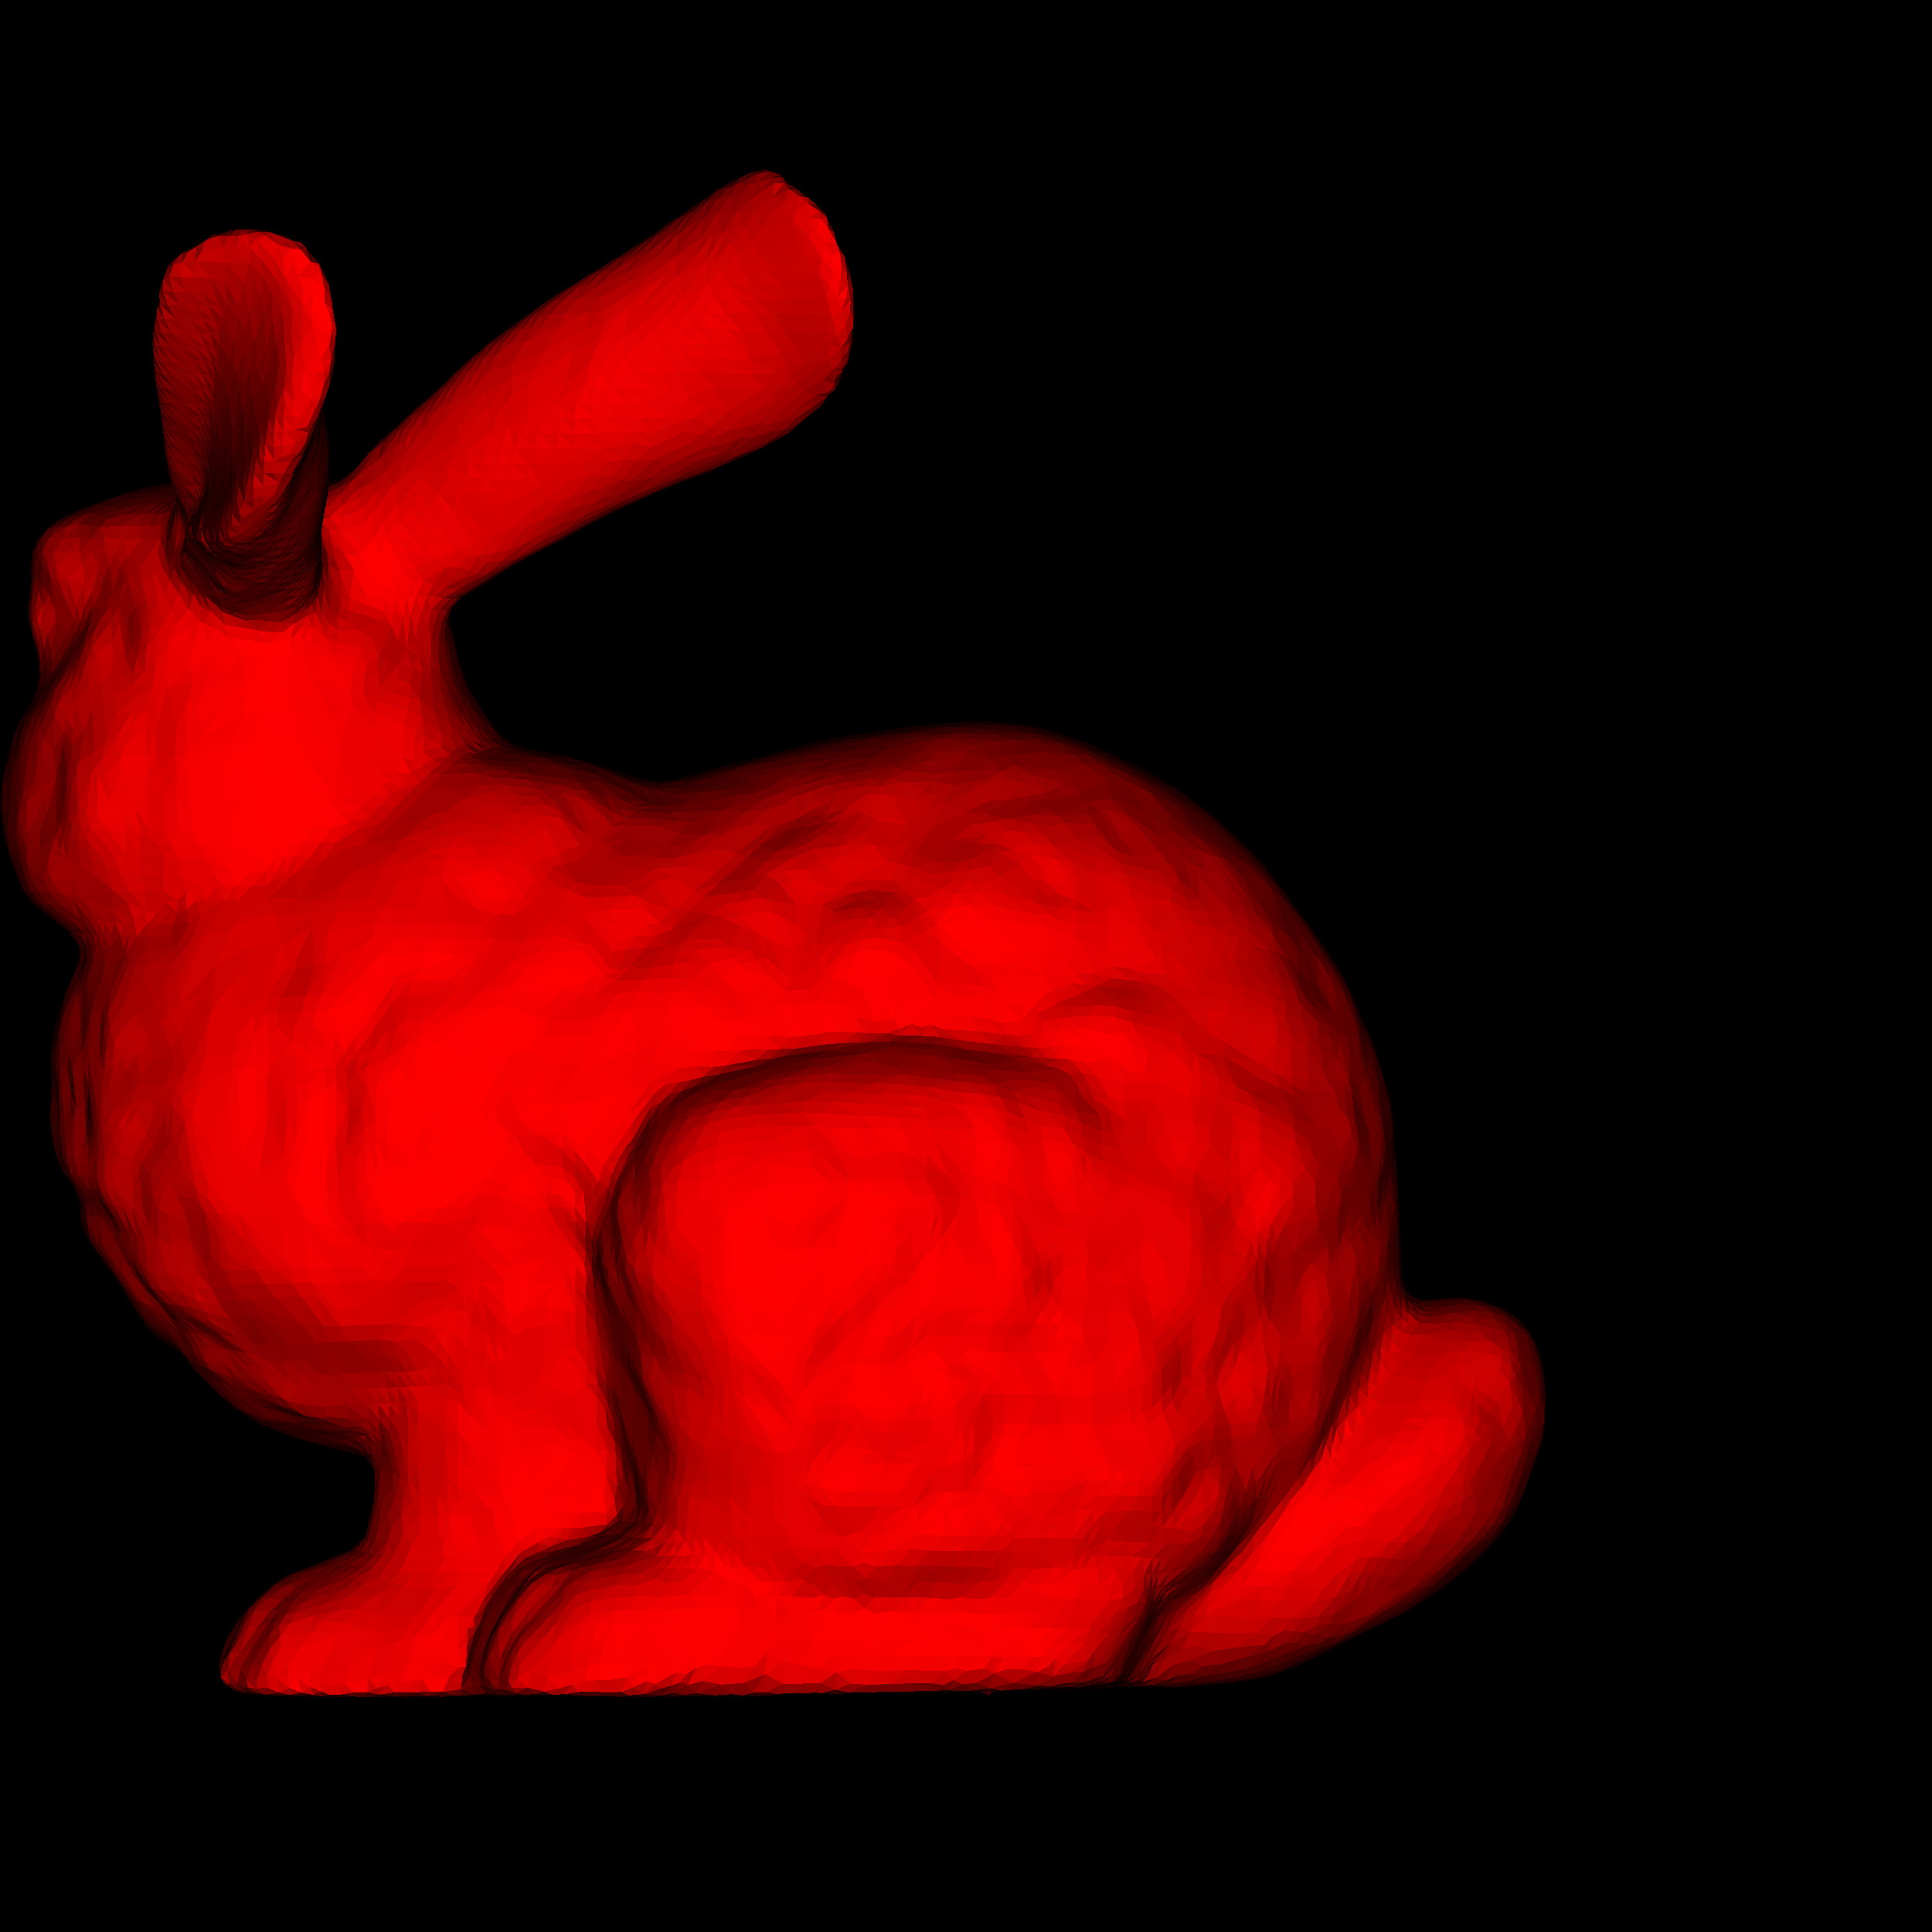

In [145]:
img